# Edit the title as Model and Controller

## Import packages

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

## Define FeedbackControlSystem class
### System
[Edit description] $\dot x = cu$. Here, $c$ is a const. parameter.
### Controller
[Edit description] $u = - (x - x_d)$. Here, $x_d$ is a desired point.

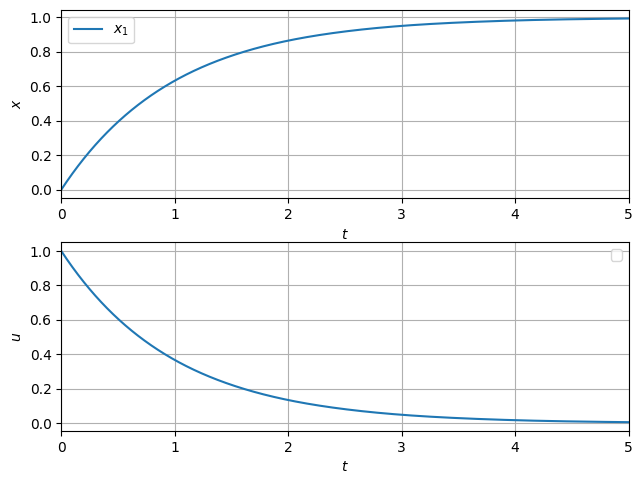

In [2]:
class FeedbackControlSystem:
    def __init__(self):
        self.name = 'model-controller'
        self.model_param = 1.
        self.ctrl_xd = 1.
        self.sim_x0 = [0.0]
        self.sim_dt = 0.001
        self.sim_t_final = 5.
        self.sim_solver = 'RK45'

    def system(self, t, x):
        # [Edit system to calculate dx/dt = f(t, x, u=k(x))]
        u = self.controller(x, t)
        dxdt = np.dot(self.model_param, u)
        return dxdt

    def controller(self, x, t):
        # [Edit system to calculate u = k(t, x)]
        u = [-(x[0] - self.ctrl_xd)]
        return u

    def solve(self):
        # Developers don't have to edit solve the ode.
        x0 = self.sim_x0
        dt = self.sim_dt
        tf = self.sim_t_final
        solver = self.sim_solver

        self.ts = np.arange(0.0, tf+dt, dt)
        sol = solve_ivp(self.system, [0.0, tf], x0, solver, self.ts)
        self.xs = sol.y.T

        # Other sequences
        # If you want to add any sequences, edit after bellow.
        u0 = self.controller(x0, 0.0)
        dim_u = len(u0) if isinstance(u0, list) else 1
        s_qty = len(self.ts) # sequence quantity
        self.us = np.empty((s_qty,dim_u))
        for n in range(s_qty):
            self.us[n,:] = self.controller(self.xs[n,:], self.ts[n])

    # Developers don't have to edit plot function
    def plot(self):
        fig, ax = plt.subplots(2,1)
        fig.tight_layout()
        # All states
        ax[0].plot(self.ts, self.xs)
        ax[0].set_xlabel('$t$')
        ax[0].set_ylabel('$x$')
        ax[0].set_xlim(0,self.sim_t_final)
        ax[0].legend([f"$x_{i+1}$" for i in range(self.xs.shape[1])])
        ax[0].grid()
        # All inputs
        ax[1].plot(self.ts, self.us)
        ax[1].set_xlabel('$t$')
        ax[1].set_ylabel('$u$')
        ax[1].set_xlim(0, self.sim_t_final)
        ax[1].legend(f"$u_{i+1}$" for i in range(self.us.shape[1]))
        ax[1].grid()
        # Show
        plt.show()

# confirm the class
fcs = FeedbackControlSystem()
fcs.solve()
fcs.plot()

## Reference
If you want readers to refer to papers, books or web sites.
- [NumPy](https://numpy.org/)
- [Scipy](https://scipy.org/)
- [Matplotlib](https://matplotlib.org/stable/)

## License
[MIT](https://github.com/kimushun1101/feedback-control-systems/blob/main/LICENSE)